<a href="https://colab.research.google.com/github/ubsuny/PHY386/blob/Homework2025/2025/HW/iamtomato761/HW2.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2 Start

In [ ]:
# import libraries
import numpy as np

## 3 mass coupled spring

*   m1=m2=m3=m
*   k1=k2=k3=k4=k

In [ ]:
# Let's calculate the frequencies numerically:

def calculate_eigenfrequencies_3mass(k, m):
    """ calculate the eigenfrequencies for our three mass problem.

    Keyword arguments:
    k -- spring constant (N/m)
    m -- mass (kg)

    returns:
    w1 -- first eigenfrequency
    w2 -- second eigenfrequency
    w3 -- third eigenfrequency
    """
    w0_squared = k / m
    w1 = np.sqrt(2*w0_squared)
    w2 = np.sqrt((2-np.sqrt(2)) * w0_squared)
    w3 = np.sqrt((2+np.sqrt(2)) * w0_squared)
    return w1, w2, w3

# Example values
k = 10  # N/m
m = 1   # kg

w1, w2, w3 = calculate_eigenfrequencies_3mass(k, m)

print("Eigenfrequencies:")
print("ω₁ = {:.4f} rad/s".format(w1))
print("ω₂ = {:.4f} rad/s".format(w2))
print("ω₃ = {:.4f} rad/s".format(w3))

Eigenfrequencies:
ω₁ = 4.4721 rad/s
ω₂ = 2.4203 rad/s
ω₃ = 5.8431 rad/s


# Extending the code


## Extend the system to n masses

In [ ]:
import numpy as np

def calculate_eigenfrequencies_n_mass(k, m, n):
    """
    Calculate the eigenfrequencies for a system of n masses connected by springs.

    Keyword arguments:
    k -- spring constant (N/m)
    m -- mass (kg)
    n -- number of masses

    Returns:
    eigenfrequencies -- an array of n eigenfrequencies
    """

    # Construct the mass and k matrices
    M = np.eye(n) * m  # mass matrix (identity * m >> diagonal)
    K = np.zeros((n, n))  # k matrix

    # Fill the k matrix
    for i in range(n):
        K[i, i] = 2 * k  # Diagonal elements
        if i > 0:
            K[i, i - 1] = -k  # Off-diagonal elements
        if i < n - 1:
            K[i, i + 1] = -k  # Off-diagonal elements

    # Solve the eigenvalue problem
    eigenvalues, _ = np.linalg.eig(np.linalg.solve(M, K))
    eigenfrequencies = np.sqrt(eigenvalues)

    return eigenfrequencies, M, K # Return M and K


# Example usage
k = 10  # N/m
m = 1   # kg
n = 6   # Number of masses

eigenfrequencies, M, K = calculate_eigenfrequencies_n_mass(k, m, n) # Receive M and K

print("Eigenfrequencies for", n, "masses:")
for i, freq in enumerate(eigenfrequencies):
    print("ω{} = {:.4f} rad/s".format(i + 1, freq))

# Print the matrices - Now M and K are in scope
print("Mass Matrix (M):\n", M)
print("\nStiffness Matrix (K):\n", K)

Eigenfrequencies for 6 masses:
ω1 = 6.1660 rad/s
ω2 = 5.6982 rad/s
ω3 = 4.9447 rad/s
ω4 = 1.4073 rad/s
ω5 = 3.9433 rad/s
ω6 = 2.7441 rad/s
Mass Matrix (M):
 [[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]

Stiffness Matrix (K):
 [[ 20. -10.   0.   0.   0.   0.]
 [-10.  20. -10.   0.   0.   0.]
 [  0. -10.  20. -10.   0.   0.]
 [  0.   0. -10.  20. -10.   0.]
 [  0.   0.   0. -10.  20. -10.]
 [  0.   0.   0.   0. -10.  20.]]


### Differences from 3 mass system



*   Uses an array for the mass, k-constant, eigenvalues, and eigenfrequencies

  + for a variable number of masses

*   fills k matrix based on pattern

$$
\begin{bmatrix}
2k & -k & 0 \\
-k & 2k & -k \\
0 & -k & 2k
\end{bmatrix}
$$

### Unit test

In [ ]:
# Example usage
k = 10  # N/m
m = 1   # kg
n = 3   # Number of masses

eigenfrequencies, M, K = calculate_eigenfrequencies_n_mass(k, m, n)

print("Eigenfrequencies for", n, "masses:")
for i, freq in enumerate(eigenfrequencies):
    print("ω{} = {:.4f} rad/s".format(i + 1, freq))

# Print the matrices - Now M and K are in scope
print("Mass Matrix (M):\n", M)
print("\nStiffness Matrix (K):\n", K)

Eigenfrequencies for 3 masses:
ω1 = 5.8431 rad/s
ω2 = 4.4721 rad/s
ω3 = 2.4203 rad/s
Mass Matrix (M):
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Stiffness Matrix (K):
 [[ 20. -10.   0.]
 [-10.  20. -10.]
 [  0. -10.  20.]]


## Adjusted so every spring and mass can be different

In [20]:
import numpy as np

def calculate_eigenfrequencies_variable_system(k_values, m_values):
    """
    Calculate the eigenfrequencies for a system with variable spring constants and masses.

    Keyword arguments:
    k_values -- a list or array of spring constants (N/m)
    m_values -- a list or array of masses (kg)

    Returns:
    eigenfrequencies -- an array of eigenfrequencies
    M -- the mass matrix
    K -- the stiffness matrix
    """
    n = len(m_values)  # Number of masses

    # Construct the mass matrix (M)
    M = np.diag(m_values)  # Create a diagonal matrix with masses

    # Construct the stiffness matrix (K)
    K = np.zeros((n, n))
    for i in range(n):
        if i == 0:  # Special case for the first mass connected to the left wall
            K[i, i] = k_values[i] + k_values[i + 1]
        elif i == n - 1:  # Special case for the last mass connected to the right wall
            K[i, i] = k_values[i] + k_values[i + 1]
        else:  # For masses in between
            K[i, i] = k_values[i] + k_values[i + 1]
        if i > 0:
            K[i, i - 1] = -k_values[i]  # Off-diagonal elements
        if i < n - 1:
            K[i, i + 1] = -k_values[i + 1]  # Off-diagonal elements

    # Solve the eigenvalue problem
    eigenvalues, _ = np.linalg.eig(np.linalg.solve(M, K))
    eigenfrequencies = np.sqrt(eigenvalues)

    return eigenfrequencies, M, K


# Example usage
k_values = [10, 12, 15, 11, 9, 8, 14]  # Spring constants for each spring
m_values = [1, 1.2, 0.8, 1.5, 1, 0.9]  # Masses for each mass

eigenfrequencies, M, K = calculate_eigenfrequencies_variable_system(k_values, m_values)

print("Eigenfrequencies for the variable system:")
for i, freq in enumerate(eigenfrequencies):
    print("ω{} = {:.4f} rad/s".format(i + 1, freq))

print("Mass Matrix (M):\n", M)
print("\nStiffness Matrix (K):\n", K)

Eigenfrequencies for the variable system:
ω1 = 6.8791 rad/s
ω2 = 1.3780 rad/s
ω3 = 2.8378 rad/s
ω4 = 4.0601 rad/s
ω5 = 5.1879 rad/s
ω6 = 5.5772 rad/s
Mass Matrix (M):
 [[1.  0.  0.  0.  0.  0. ]
 [0.  1.2 0.  0.  0.  0. ]
 [0.  0.  0.8 0.  0.  0. ]
 [0.  0.  0.  1.5 0.  0. ]
 [0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0.  0.9]]

Stiffness Matrix (K):
 [[ 22. -12.   0.   0.   0.   0.]
 [-12.  27. -15.   0.   0.   0.]
 [  0. -15.  26. -11.   0.   0.]
 [  0.   0. -11.  20.  -9.   0.]
 [  0.   0.   0.  -9.  17.  -8.]
 [  0.   0.   0.   0.  -8.  22.]]


### Differences from all the same mass and spring constant

1. function accepts lists/arrays of k_values and m_values: "k_values" and "m_values"

2. mass matrix "np.diag(m.values)" creates a diagonal matric where the diagonal entries are the different masses

3. K matrix follows the pattern

$$
\begin{bmatrix}
k1+k2 & -k2 & 0 \\
-k2 & k2+k3 & -k3 \\
0 & -k3 & k3+k4
\end{bmatrix}
$$


### Unit test

In [ ]:
k_values = [10, 10, 10, 10]
m_values = [1, 1, 1]

eigenfrequencies, M, K = calculate_eigenfrequencies_variable_system(k_values, m_values)

print("Eigenfrequencies for the variable system:")
for i, freq in enumerate(eigenfrequencies):
    print("ω{} = {:.4f} rad/s".format(i + 1, freq))

print("Mass Matrix (M):\n", M)
print("\nStiffness Matrix (K):\n", K)

Eigenfrequencies for the variable system:
ω1 = 5.8431 rad/s
ω2 = 4.4721 rad/s
ω3 = 2.4203 rad/s
Mass Matrix (M):
 [[1 0 0]
 [0 1 0]
 [0 0 1]]

Stiffness Matrix (K):
 [[ 20. -10.   0.]
 [-10.  20. -10.]
 [  0. -10.  20.]]


## Add conditional statement

In [27]:
import numpy as np

def calculate_eigenfrequencies_variable_system(k_values, m_values):
    """
    Calculate the eigenfrequencies for a system with variable spring constants and masses.

    Keyword arguments:
    k_values -- a list or array of spring constants (N/m)
    m_values -- a list or array of masses (kg)

    Returns:
    eigenfrequencies -- an array of eigenfrequencies
    M -- the mass matrix
    K -- the stiffness matrix
    """
    n = len(m_values)  # Number of masses

    # Construct the mass matrix (M)
    M = np.diag(m_values)  # Create a diagonal matrix with masses

    # Construct the stiffness matrix (K)
    K = np.zeros((n, n))
    for i in range(n):
        if i == 0:  # Special case for the first mass connected to the left wall
            K[i, i] = k_values[i] + k_values[i + 1]
        elif i == n - 1:  # Special case for the last mass connected to the right wall
            K[i, i] = k_values[i] + k_values[i+1]
        else:  # For masses in between
            K[i, i] = k_values[i] + k_values[i + 1]
        if i > 0:
            K[i, i - 1] = -k_values[i]  # Off-diagonal elements
        if i < n - 1:
            K[i, i + 1] = -k_values[i + 1]  # Off-diagonal elements

    # Solve the eigenvalue problem
    eigenvalues, _ = np.linalg.eig(np.linalg.solve(M, K))
    eigenfrequencies = np.sqrt(eigenvalues)

    # Conditional statements for wall presence
    if k_values[0] == 0 and k_values[-1] == 0:
        print("We are unprotected and floating in space")
    elif k_values[0] == 0:
        print("The west wall has fallen :(")
    elif k_values[-1] == 0:
        print("The east wall has fallen :(")
    else:
        print("We have walls!")

    return eigenfrequencies, M, K


# Example usage
k_values = [10, 12, 15, 11, 9, 8, 0]  # Spring constants for each spring
m_values = [1, 1.2, 0.8, 1.5, 1, 0.9]  # Masses for each mass

eigenfrequencies, M, K = calculate_eigenfrequencies_variable_system(k_values, m_values)

print("Eigenfrequencies for the variable system:")
for i, freq in enumerate(eigenfrequencies):
    print("ω{} = {:.4f} rad/s".format(i + 1, freq))

print("Mass Matrix (M):\n", M)
print("\nStiffness Matrix (K):\n", K)

The east wall has fallen :(
Eigenfrequencies for the variable system:
ω1 = 6.8787 rad/s
ω2 = 5.3129 rad/s
ω3 = 4.8666 rad/s
ω4 = 3.3915 rad/s
ω5 = 0.7877 rad/s
ω6 = 2.2075 rad/s
Mass Matrix (M):
 [[1.  0.  0.  0.  0.  0. ]
 [0.  1.2 0.  0.  0.  0. ]
 [0.  0.  0.8 0.  0.  0. ]
 [0.  0.  0.  1.5 0.  0. ]
 [0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0.  0.9]]

Stiffness Matrix (K):
 [[ 22. -12.   0.   0.   0.   0.]
 [-12.  27. -15.   0.   0.   0.]
 [  0. -15.  26. -11.   0.   0.]
 [  0.   0. -11.  20.  -9.   0.]
 [  0.   0.   0.  -9.  17.  -8.]
 [  0.   0.   0.   0.  -8.   8.]]


### Unit test

In [28]:
k_values = [10, 10, 10, 10]
m_values = [1, 1, 1]

eigenfrequencies, M, K = calculate_eigenfrequencies_variable_system(k_values, m_values)

print("Eigenfrequencies for the variable system:")
for i, freq in enumerate(eigenfrequencies):
    print("ω{} = {:.4f} rad/s".format(i + 1, freq))

print("Mass Matrix (M):\n", M)
print("\nStiffness Matrix (K):\n", K)

We have walls!
Eigenfrequencies for the variable system:
ω1 = 5.8431 rad/s
ω2 = 4.4721 rad/s
ω3 = 2.4203 rad/s
Mass Matrix (M):
 [[1 0 0]
 [0 1 0]
 [0 0 1]]

Stiffness Matrix (K):
 [[ 20. -10.   0.]
 [-10.  20. -10.]
 [  0. -10.  20.]]


# AI creative

## Analysis of conversation

I used deepseek (with DeepThink (R1)) because I have always wanted to play around with this AI. This allowed me to see how the AI was "thinking" before it gave me its answer, which meant it having a conversation with itself on whether the systems were physical. This led to my not questioning if it is physical. I know that it is physical because in the end, it only alternated the k-constants.

I probably could have asked it for a more creative adjustment, but it mentioned bandgaps in its deep thought and the final message said "This setup is inspired by superlattices in materials science, leading to interesting band gaps." 😲 I decided the creativity is trying to replicate bandgaps.

This is when I steered away from AI, which was a *big* mistake. The old-fashioned Google gave me papers on nonlinearly coupled oscillators producing band gaps, so I asked DeepSeek if the springs needed to be nonlinear (not constants). I also asked Google's AI if this were the case. Both told me no. Therefore, I should have just asked AI instead of assuming papers are the only real information.

DeepSeek gave me one way to see a bandgap in a frequency density plot. It wasn't enough for me to see a real gap, so it put a high contrast between the alternating frequencies and increased the number of springs.

I noticed a trend playing with different k-constants that the frequencies stayed near the 2 constants. I asked DeepSeek if more k-values would give me more bandgaps and it gave me a long "DeepThink" conversation, so I turned off DeepThink. The conclusion was that yes, more k-values should give more gaps.

I am not knowledgeable enough to know if the plot is really showing what they call "band gaps" or if it was just gaps, so I asked Google AI. This is how I discovered the plot I am used to seeing! "Frequency vs. wavevector."

I asked DeepSeek to give me a frequency vs. wavevector plot and that showed me some beautiful bandgaps.

## 1 bandgap with 2 alternating k-values

<ipython-input-35-4e6d25600ec4>:26: RuntimeWarning: invalid value encountered in sqrt
  eigenfrequencies = np.sqrt(eigenvalues)


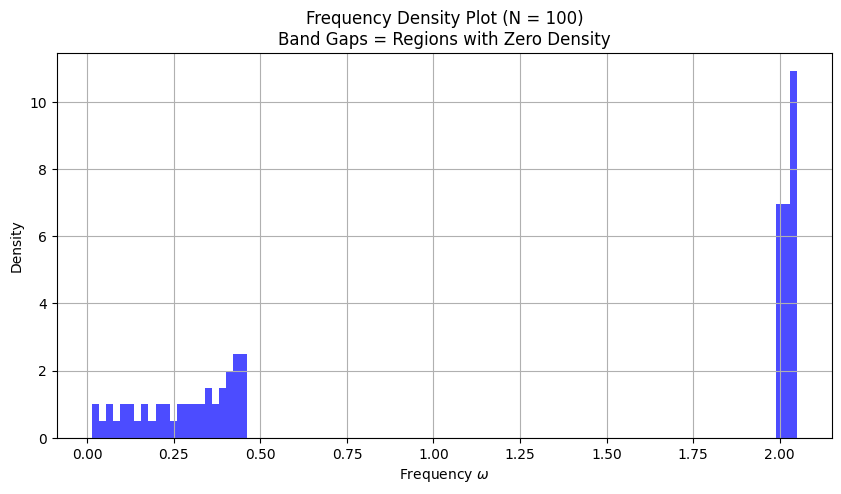

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eigvalsh

# Parameters
N = 100      # Large system to approximate periodicity
m = 1.0
k1, k2 = 2.0, 0.1  # High contrast for pronounced gaps

# Build stiffness matrix
K = np.zeros((N, N))
for i in range(N):
    # Left spring (alternating k1/k2)
    if i > 0:
        left_k = k1 if (i-1) % 2 == 0 else k2
        K[i, i] += left_k
        K[i, i-1] -= left_k
    # Right spring
    if i < N-1:
        right_k = k1 if i % 2 == 0 else k2
        K[i, i] += right_k
        K[i, i+1] -= right_k

# Calculate eigenfrequencies
eigenvalues = eigvalsh(K / m)
eigenfrequencies = np.sqrt(eigenvalues)

# Plot frequency density (bands and gaps)
plt.figure(figsize=(10, 5))
plt.hist(eigenfrequencies, bins=100, density=True, alpha=0.7, color='blue')
plt.title(f"Frequency Density Plot (N = {N})\nBand Gaps = Regions with Zero Density")
plt.xlabel("Frequency $\omega$")
plt.ylabel("Density")
plt.grid(True)
plt.show()

## 2? bandgaps with 3 alternating k-values

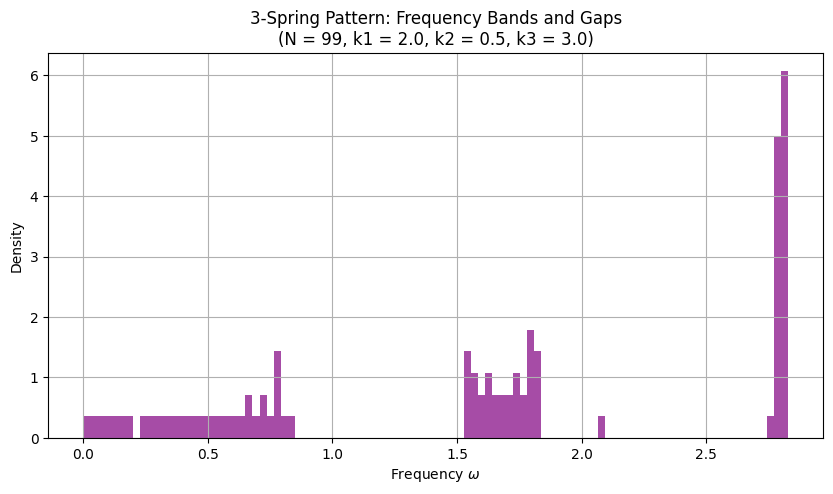

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eigvalsh

# Parameters
N = 99        # Large system (divisible by 3 for clean periodicity)
m = 1.0
k1, k2, k3 = 2.0, 0.5, 3.0  # Three distinct spring constants

# Build stiffness matrix
K = np.zeros((N, N))
for i in range(N):
    # Determine right spring (pattern: k1 → k2 → k3 → repeat)
    if i < N-1:
        cycle_pos = i % 3
        right_k = [k1, k2, k3][cycle_pos]
    else:
        right_k = 0

    # Determine left spring (previous mass's right spring)
    if i > 0:
        cycle_pos_prev = (i-1) % 3
        left_k = [k1, k2, k3][cycle_pos_prev]
    else:
        left_k = 0

    # Diagonal and off-diagonal terms
    K[i, i] = left_k + right_k
    if i > 0:
        K[i, i-1] = -left_k
    if i < N-1:
        K[i, i+1] = -right_k

# Eigenfrequencies
eigenfrequencies = np.sqrt(eigvalsh(K / m))

# Plot frequency density
plt.figure(figsize=(10, 5))
plt.hist(eigenfrequencies, bins=100, density=True, alpha=0.7, color='purple')
plt.title(f"3-Spring Pattern: Frequency Bands and Gaps\n(N = {N}, k1 = {k1}, k2 = {k2}, k3 = {k3})")
plt.xlabel("Frequency $\omega$")
plt.ylabel("Density")
plt.grid(True)
plt.show()

## Frequency vs. Wave Vector bandgap plot

<ipython-input-41-305ef2ada0c5>:37: RuntimeWarning: invalid value encountered in sqrt
  frequencies.append(np.sqrt(eigenvalues))


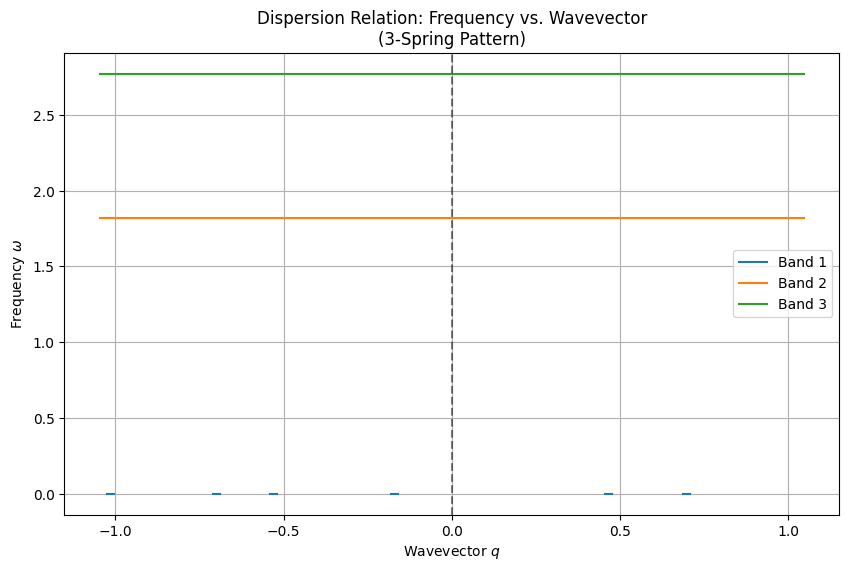

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eigvalsh

# Parameters
m = 1.0
k1, k2, k3 = 2.0, 0.5, 3.0  # Spring constants
a = 3.0  # Unit cell size (3 masses per cell)

# Dynamical matrix for a given wavevector q
def dynamical_matrix(q):
    D = np.zeros((3, 3), dtype=complex)

    # Diagonal terms
    D[0, 0] = (k1 + k3) / m
    D[1, 1] = (k1 + k2) / m
    D[2, 2] = (k2 + k3) / m

    # Off-diagonal terms (coupling between masses in the unit cell)
    D[0, 1] = -k1 * np.exp(-1j * q * a) / m
    D[1, 0] = -k1 * np.exp(1j * q * a) / m
    D[1, 2] = -k2 * np.exp(-1j * q * a) / m
    D[2, 1] = -k2 * np.exp(1j * q * a) / m
    D[0, 2] = -k3 * np.exp(-1j * q * 2 * a) / m
    D[2, 0] = -k3 * np.exp(1j * q * 2 * a) / m

    return D

# Wavevector range (Brillouin zone)
q_values = np.linspace(-np.pi/a, np.pi/a, 100)
frequencies = []

# Compute eigenfrequencies for each q
for q in q_values:
    D_q = dynamical_matrix(q)
    eigenvalues = np.real(eigvalsh(D_q))  # Eigenvalues are real
    frequencies.append(np.sqrt(eigenvalues))

frequencies = np.array(frequencies)

# Plot dispersion relation
plt.figure(figsize=(10, 6))
for band in range(3):
    plt.plot(q_values, frequencies[:, band], label=f"Band {band+1}")
plt.title("Dispersion Relation: Frequency vs. Wavevector\n(3-Spring Pattern)")
plt.xlabel("Wavevector $q$")
plt.ylabel("Frequency $\omega$")
plt.axvline(0, color='black', linestyle='--', alpha=0.5)
plt.legend()
plt.grid(True)
plt.show()

## If I were to do more...

I would like to also play around with if they are not alternating periodically, there are just 3 k-values as options, so something like:

k1, k2, k2, k3, k2, k1, k1, k3

I am going to look out for my mental health instead and commit only this, eat dinner, and go to sleep.